In [933]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import kmodes
import requests 
%matplotlib inline

In [934]:
#reading the excel sheets as dataframes
data_m = pd.read_excel('Sample data - AI Reco Engine.xlsx', sheet_name='Mentors Bucket')

#mentors dataframe
df_m = pd.DataFrame(data_m)
#for shuffling the records
df_m=df_m.sample(frac=1).reset_index(drop=True)

data_u=pd.read_excel('Sample data - AI Reco Engine.xlsx', sheet_name='User Bucket')
#users dataframe
df_u=pd.DataFrame(data_u)
#for shuffling the records
df_u=df_u.sample(frac=1).reset_index(drop=True)

# Cleaning of the dataframes

In [935]:
#dropping the records containing null values
df_m=df_m.dropna()
df_m

,id,name,sex,city,city_tier,sector,company,designation,shortlistedforcompany,college,...,ssc,hsc,cgpa,internship,other,postcity,othrahiev,gdduration,threewddcrua,is_active
18,16.0,Sahas Aggarwal,M,Bikaner,II,Logistics,Delhivery,Operational manager,"PWC, KPMG, Clean Max Solar, Futures first",IIT Bombay,...,95.5,84.4,6.20,"Apeejay Stya Svran Group, Hayden Reynott & SIC","PWC, KPMG, Clean Max Solar, Futures first",Mumbai,INSPIRE Scholarship from Govt of India,2015-2019,Dancer | Volunteer | Film Making,Y
37,7.0,Prathu Baronia,M,Delhi,I,Technology,OnePlus,R &D Software Developer,"Xilinx, Analog Devices, Mathworks, Nvidia, Qua...",IIT Bombay,...,90.4,90.4,9.00,Embedded System Engineer at Greetude Energy Pv...,"Xilinx, Analog Devices, Mathworks, Nvidia, Qua...",Bangalore,"98.1%ile in NSE Astronomy-2014, 99%ile in NSE ...",2014-2019,Musician | Cricketer | Techie,Y
41,21.0,Kartik Singhal,M,Jaipur,II,Finance,Goldman Sachs,Analyst,"Microsoft, Samsung Korea, DE Shaw",IIT Bombay,...,100,91.8,8.39,"Webstaff, Inc. (2nd Year), Goldman Sachs(3rd Y...","Microsoft, Samsung Korea, DE Shaw",Bangalore,"JEE AIR 21, GRE 321",2015-2019,Binge Watcher | Globetrotter | Foodie,Y
78,20.0,Kunal Agarwal,M,Jodhpur,II,Telecommunication,Rakuten,Product Manager,"Goldmann Sachs, Citibank, Mastercard, American...",IIT Bombay,...,100,94.2,8.44,"University of Vienna(2nd year), HDFC Life(3rd ...","Goldmann Sachs, Citibank, Mastercard, American...",Tokyo,CAT 99.88%ile,2015-2019,Musician | Analytical | Straight forward,Y
102,37.0,Sakshi Solanki,F,Bangalore,I,Finance,Morgan Stanley,Operation Analyst,None,Jain College,...,75,80,7.60,i-Nurture Education Solutions,Did not apply elsewhere,Bangalore,"Member of ENACTUS club in College, Hockey Team",2017-2019,Football | Avid Reader | Movies,Y
127,24.0,Ravindra Sagar,M,Pondicherry,II,Analytics,India Infoline,Analytics Associate,"Kotak Mahindra, Citi, Robert Bosch, Loreal",IIT Bombay,...,97.6,92.8,7.02,Hilti Manufacturing India (3rd year),"Kotak Mahindra, Citi, Robert Bosch, Loreal",Mumbai,Jee Air 1600,2015-2019,Blogger | Swimmer | Karate State Champ,Y
165,141.0,Ritika Swami,F,Mumbai,I,Legal,Legasis,Intern - Legal,Only applied for one,Amity University,...,89,84,7.90,Bombay HC,Not Applicable,Mumbai,CLAT 122,2016-2021,Avid Reader | Perfectionist | Swimmer,Y
181,23.0,Aadhar Khajanchi,M,Indore,II,Finance,Mastercard,Trainee Analyst,"Nomura Research Institute, Alvarez & Marshal, ...",IIT Bombay,...,83.6,91.8,7.14,"American Express (3rd year), Reliance Jio (3rd...","Nomura Research Institute, Alvarez & Marshal, ...",Gurgaon,JEE AIR 1018,2015-2019,Creative | Gym freak | Foodie,Y
197,103.0,Anku Kumar Choudhary,M,Bhagalpur,III,Technology,Strand Life Science,Software Engineer,"Ubisoft, Socitie General, SumTotal, Seimens,",IIT Bombay,...,100,91.8,7.18,Frost & Sullivan (3rd Year),"Ubisoft, Socitie General, SumTotal, Seimens",Bangalore,JEE - 7681,2015-2019,Explorer | Enthusiastic | Fearless,Y
198,18.0,Sawan Soni,M,Jodhpur,II,HR,Aasaan Jobs,Assistant Product Manager,"PnG, EY, Gulf talent, Oyo rooms",IIT Bombay,...,98,83,7.70,"Design Engineer at Peri India Pvt Ltd, BDA at ...","PnG, EY, Gulf talent, Oyo rooms",Mumbai,Organized IITB Run,2015-2019,Writer | Sports Person | Mentor,Y


In [937]:
#obtaining a basic info about the data-types of different parameters
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36665 entries, 0 to 36664
Data columns (total 27 columns):
id                     36665 non-null int64
dob                    19031 non-null object
gender                 20780 non-null object
hometown               1089 non-null object
hometown tier          1081 non-null object
preferedsector         928 non-null object
targetedfirms          556 non-null object
targetedinternfirms    1619 non-null object
academicproject        1129 non-null object
leadership             1099 non-null object
internship             1017 non-null object
extracurricular        1066 non-null object
collegename            20480 non-null object
College Tier           1078 non-null object
program                8320 non-null object
department             4659 non-null object
coursefromto           31415 non-null object
cpicgpa                5186 non-null object
10percent              1214 non-null object
12percent              1153 non-null object
pastinter

In [938]:
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 18 to 373
Data columns (total 23 columns):
id                       25 non-null float64
name                     25 non-null object
sex                      25 non-null object
city                     25 non-null object
city_tier                25 non-null object
sector                   25 non-null object
company                  25 non-null object
designation              25 non-null object
shortlistedforcompany    25 non-null object
college                  25 non-null object
College_tier             25 non-null object
program                  25 non-null object
department               25 non-null object
ssc                      25 non-null object
hsc                      25 non-null object
cgpa                     25 non-null float64
internship               25 non-null object
other                    25 non-null object
postcity                 25 non-null object
othrahiev                25 non-null object
gdduration   

In [939]:
#using only relatable parametes for both dataframes
df_m=df_m[['id','city_tier','sector','company','ssc','hsc','cgpa','department','College_tier','sex','program']] 

df_u=df_u[['id','hometown tier','preferedsector','targetedfirms','10percent','12percent','cpicgpa','department','College Tier','gender','program']]

#changing all the words to lowercase for better comparison
df_m=df_m.apply(lambda x:x.astype(str).str.lower())
df_u=df_u.apply(lambda x:x.astype(str).str.lower())

#dropping null records
df_u=df_u.dropna()

df_m#.head()

,id,city_tier,sector,company,ssc,hsc,cgpa,department,College_tier,sex,program
18,16.0,ii,logistics,delhivery,95.5,84.4,6.2,civil engineering,tier i,m,b.tech
37,7.0,i,technology,oneplus,90.4,90.4,9.0,electrical engineering,tier i,m,dual degree
41,21.0,ii,finance,goldman sachs,100,91.8,8.39,computer science,tier i,m,b.tech
78,20.0,ii,telecommunication,rakuten,100,94.2,8.44,chemical engineering,tier i,m,b.tech
102,37.0,i,finance,morgan stanley,75,80,7.6,finance,tier iv,f,bms
127,24.0,ii,analytics,india infoline,97.6,92.8,7.02,mechanical,tier i,m,b.tech
165,141.0,i,legal,legasis,89,84,7.9,corporate law,tier ii,f,bba llb (honours)
181,23.0,ii,finance,mastercard,83.6,91.8,7.14,civil engineering,tier i,m,b.tech
197,103.0,iii,technology,strand life science,100,91.8,7.18,metallurgy,tier i,m,b.tech
198,18.0,ii,hr,aasaan jobs,98,83,7.7,civil engineering,tier i,m,b.tech


In [941]:
#shuffling users dataframe to get a better distribution of users
df_u=df_u.sample(frac=1).reset_index(drop=True)

df_u

,id,hometown tier,preferedsector,targetedfirms,10percent,12percent,cpicgpa,department,College Tier,gender,program
0,19787,tier ii,"technical, software",google,80,65,8.4,electronics,tier iv,f,b.tech
1,34,tier i,design,google,89,88,7.4,metallurgy,tier i,f,b tech
2,30663,tier i,entrepreneur,"oyo,google",92,98,8.07,aeronautical engineering,tier iv,f,b tech
3,21434,tier iii,it,"google, ios, android, tcs",64,51,8.4,it,tier iv,m,b. sc
4,28693,tier ii,civil engineering,hindustan construction company,75,56,7,civil engineering,tier iv,f,b.tech
...,...,...,...,...,...,...,...,...,...,...,...
219,31060,tier ii,it,web designing and development,9.6,9.47,9,computer science,tier iv,m,b.sc
220,1368,tier i,design,"tata motors, altair",95.09,84.5,8.3,mechanical,tier iii,m,m.tecb
221,33929,tier i,it firm,google jpmorgan,83.02,77.34,8.3,electronic and telecommunications,tier iv,m,be
222,31915,tier i,hyderabad,amazon,9.5,9,7,mechanical,tier iv,m,java


In [973]:
options = ['technology', 'finance','analytics'] 

# selecting rows based on condition 
rs = df_u.loc[df_u['preferedsector'].isin(options)]
#creating a dataframe containing four users
df_u=rs[:4]
#df_u

In [974]:
df_u

,id,hometown tier,preferedsector,targetedfirms,10percent,12percent,cpicgpa,department,College Tier,gender,program
0,2419,tier i,finance,google,60,70,7.5,civil,tier iv,m,b.tech
1,567,tier ii,technology,"google, microsoft, amazon, uber, walmart",93,94,7.8,electronics and communication,tier ii,m,b.tech
2,19852,tier i,technology,"google ,amazon ,tesla",94,84,7.5,electronics and communication,tier iv,m,be
3,32595,tier ii,finance,"accenture, eclerx, capgemini, icici, l&t, etc..!",76,79,8.23,finance,tier iv,m,b.m.s.


In [975]:
df_m

,id,city_tier,sector,company,ssc,hsc,cgpa,department,College_tier,sex,program
18,16.0,ii,logistics,delhivery,95.5,84.4,6.2,civil engineering,tier i,m,b.tech
37,7.0,i,technology,oneplus,90.4,90.4,9.0,electrical engineering,tier i,m,dual degree
41,21.0,ii,finance,goldman sachs,100,91.8,8.39,computer science,tier i,m,b.tech
78,20.0,ii,telecommunication,rakuten,100,94.2,8.44,chemical engineering,tier i,m,b.tech
102,37.0,i,finance,morgan stanley,75,80,7.6,finance,tier iv,f,bms
127,24.0,ii,analytics,india infoline,97.6,92.8,7.02,mechanical,tier i,m,b.tech
165,141.0,i,legal,legasis,89,84,7.9,corporate law,tier ii,f,bba llb (honours)
181,23.0,ii,finance,mastercard,83.6,91.8,7.14,civil engineering,tier i,m,b.tech
197,103.0,iii,technology,strand life science,100,91.8,7.18,metallurgy,tier i,m,b.tech
198,18.0,ii,hr,aasaan jobs,98,83,7.7,civil engineering,tier i,m,b.tech


In [976]:
len(df_m)

25

# Similarity scores calculation between mentors and users dataframe for assigning of mentors to users

In [1112]:
#creating lists for each column of the mentors dataframe containing data of each reord

In [988]:
lm1=list(df_m["id"])
lm2=list(df_m["city_tier"])
lm3=list(df_m["sector"])
lm4=list(df_m["company"])
lm5=list(df_m["ssc"])
lm6=list(df_m["hsc"])
lm7=list(df_m["cgpa"])
lm8=list(df_m["department"])
lm9=list(df_m["College_tier"])
lm10=list(df_m["sex"])
lm11=list(df_m["program"])
lm7

['6.2',
 '9.0',
 '8.39',
 '8.44',
 '7.6',
 '7.02',
 '7.9',
 '7.14',
 '7.18',
 '7.7',
 '6.03',
 '7.68',
 '7.8',
 '7.12',
 '8.2',
 '9.54',
 '6.1',
 '6.5',
 '7.57',
 '7.54',
 '7.5',
 '7.85',
 '7.16',
 '7.4',
 '6.29']

In [989]:
lm5

['95.5',
 '90.4',
 '100',
 '100',
 '75',
 '97.6',
 '89',
 '83.6',
 '100',
 '98',
 '100',
 '95',
 '95',
 '95',
 '94.8',
 '100',
 '88.3',
 '89',
 '100',
 '98',
 '95.82',
 '96',
 '0.9067',
 '100',
 '95']

In [990]:
lm5=[float(i) for i in lm5]
lm5

[95.5,
 90.4,
 100.0,
 100.0,
 75.0,
 97.6,
 89.0,
 83.6,
 100.0,
 98.0,
 100.0,
 95.0,
 95.0,
 95.0,
 94.8,
 100.0,
 88.3,
 89.0,
 100.0,
 98.0,
 95.82,
 96.0,
 0.9067,
 100.0,
 95.0]

In [991]:
#creating a range for the ssc grades of mentors for a better comparison with users

for i in range(0,len(lm5)):
    if float(lm5[i])>0 and float(lm5[i])<=1:
        lm5[i]=float(lm5[i])*100
        if float(lm5[i])>=60.0 and float(lm5[i])<70.0:
            lm5[i]=7
        elif float(lm5[i])>=70.0 and float(lm5[i])<80.0:
            lm5[i]=8
        elif float(lm5[i])>=80.0 and float(lm5[i])<90.0:
            lm5[i]=9
        elif float(lm5[i])>=90 and float(lm5[i])<=100.0:
            lm5[i]=10
        
    if float(lm5[i])>=60.0 and float(lm5[i])<70.0:
        lm5[i]=7
    elif float(lm5[i])>=70.0 and float(lm5[i])<80.0:
        lm5[i]=8
    elif float(lm5[i])>=80.0 and float(lm5[i])<90.0:
        lm5[i]=9
    elif float(lm5[i])>=90 and float(lm5[i])<=100.0:
        lm5[i]=10
    

In [992]:
lm5

[10,
 10,
 10,
 10,
 8,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [993]:
#creating a range for the ssc grades of mentors for a better comparison with users

for i in range(0,len(lm6)):
    if float(lm6[i])>=60.0 and float(lm6[i])<70.0:
        lm6[i]=7
    elif float(lm6[i])>=70.0 and float(lm6[i])<80.0:
        lm5[i]=8
    elif float(lm6[i])>=80.0 and float(lm6[i])<90.0:
        lm6[i]=9
    elif float(lm6[i])>=90 and float(lm6[i])<=100.0:
        lm6[i]=10
    

In [994]:
lm6

[9,
 10,
 10,
 10,
 9,
 10,
 9,
 10,
 10,
 9,
 9,
 10,
 9,
 10,
 10,
 10,
 9,
 9,
 10,
 9,
 9,
 10,
 10,
 9,
 10]

In [995]:
#creating a range for the cgpa of mentors for a better matching with users cgpa
for i in range(0,len(lm7)):
    if float(lm7[i])>=5.5 and float(lm7[i])<6.5:
        lm7[i]=6
    elif float(lm7[i])>=6.5 and float(lm7[i])<7.5:
        lm7[i]=7
    elif float(lm7[i])>=7.5 and float(lm7[i])<8.5:
        lm7[i]=8
    elif float(lm7[i])>=8.5 and float(lm7[i])<9.5:
        lm7[i]=9
    elif float(lm7[i])>=9.5 and float(lm7[i])<=10.0:
        lm7[i]=10
    

In [996]:
lm7

[6, 9, 8, 8, 8, 7, 8, 7, 7, 8, 6, 8, 8, 7, 8, 10, 6, 7, 8, 8, 8, 8, 7, 7, 6]

In [997]:
#creating lists for each column of the users dataframe containing data of each reord
lu1=list(df_u["id"])
lu2=list(df_u["hometown tier"])
lu3=list(df_u["preferedsector"])
lu4=list(df_u["targetedfirms"])
lu5=list(df_u["10percent"])
lu6=list(df_u["12percent"])
lu7=list(df_u["cpicgpa"])
lu8=list(df_u["department"])
lu9=list(df_u["College Tier"])
lu10=list(df_u["gender"])
lu11=list(df_u["program"])
lu6

['70', '94', '84', '79']

In [998]:
for i in range(0,len(lu5)):
    if float(lu5[i])>=50.0 and float(lu5[i])<70.0:
        lu5[i]=7
    elif float(lu5[i])>=70.0 and float(lu5[i])<80.0:
        lu5[i]=8
    elif float(lu5[i])>=80.0 and float(lu5[i])<90.0:
        lu5[i]=9
    elif float(lu5[i])>=90 and float(lu5[i])<=100.0:
        lu5[i]=10
lu5

[7, 10, 10, 8]

In [999]:
for i in range(0,len(lu6)):
    if float(lu6[i])>=50.0 and float(lu6[i])<70.0:
        lu6[i]=7
    elif float(lu6[i])>=70.0 and float(lu6[i])<80.0:
        lu6[i]=8
    elif float(lu6[i])>=80.0 and float(lu6[i])<90.0:
        lu6[i]=9
    elif float(lu6[i])>=90 and float(lu6[i])<=100.0:
        lu6[i]=10
lu6   

[8, 10, 9, 8]

In [1000]:
for i in range(0,len(lu7)):
    
    if float(lu7[i])>=5.5 and float(lu7[i])<=6.5:
        lu7[i]=6
    elif float(lu7[i])>=6.5 and float(lu7[i])<=7.5:
        lu7[i]=7
    elif float(lu7[i])>=7.5 and float(lu7[i])<=8.5:
        lu7[i]=8
    elif float(lu7[i])>=8.5 and float(lu7[i])<=9.5:
        lu7[i]=9
    elif float(lu7[i])>=9.5 and float(lu7[i])<=10.0:
        lu7[i]=10
    

In [1001]:
lu7

[7, 8, 7, 8]

In [1002]:
df_u

,id,hometown tier,preferedsector,targetedfirms,10percent,12percent,cpicgpa,department,College Tier,gender,program
0,2419,tier i,finance,google,60,70,7.5,civil,tier iv,m,b.tech
1,567,tier ii,technology,"google, microsoft, amazon, uber, walmart",93,94,7.8,electronics and communication,tier ii,m,b.tech
2,19852,tier i,technology,"google ,amazon ,tesla",94,84,7.5,electronics and communication,tier iv,m,be
3,32595,tier ii,finance,"accenture, eclerx, capgemini, icici, l&t, etc..!",76,79,8.23,finance,tier iv,m,b.m.s.


In [1003]:
lu2

['tier i', 'tier ii', 'tier i', 'tier ii']

In [1004]:
lm2

['ii',
 'i',
 'ii',
 'ii',
 'i',
 'ii',
 'i',
 'ii',
 'iii',
 'ii',
 'iii',
 'ii',
 'ii',
 'ii',
 'i',
 'iii',
 'iii',
 'ii',
 'ii',
 'ii',
 'ii',
 'ii',
 'ii',
 'ii',
 'iii']

In [1005]:
#Converting hometown tier of users to a comparable equivalent string with city_tier of mentors
for i in range(0,len(lu2)):
    if lu2[i]=="tier i":
        lu2[i]="i"
    elif lu2[i]=="tier ii":
        lu2[i]="ii"
    elif lu2[i]=="tier iii":
        lu2[i]="iii"
    elif lu2[i]=="tier iv":
        lu2[i]="iv"
 

In [1006]:
#
sim2=[]
for i in lu2:
    s=[]
    for j in lm2:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim2.append(s)
            

In [1007]:
sim2

[[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]]

In [1008]:
sim3=[]
for i in lu3:
    s=[]
    for j in lm3:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim3.append(s)
sim3            

[[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]]

In [1009]:
lu4

['google',
 'google, microsoft, amazon, uber, walmart',
 'google ,amazon ,tesla ',
 'accenture, eclerx, capgemini, icici, l&t, etc..!']

In [1010]:
lm4

['delhivery',
 'oneplus',
 'goldman sachs',
 'rakuten',
 'morgan stanley',
 'india infoline',
 'legasis',
 'mastercard',
 'strand life science',
 'aasaan jobs',
 'oyo',
 'oyo',
 'siemens plm',
 'exxonmobil',
 'bcg',
 'optiver',
 'capgemini',
 'indegene pvt. ltd.',
 'oyo',
 'jp morgan chase',
 'viacom 18',
 'ims consulting',
 'citi bank',
 'google inc.',
 'reliance jio']

In [1011]:
sim4=[]
for i in lu4:
    s=[]
    for j in lm4:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim4.append(s)
sim4   

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [1012]:
lu4

['google',
 'google, microsoft, amazon, uber, walmart',
 'google ,amazon ,tesla ',
 'accenture, eclerx, capgemini, icici, l&t, etc..!']

In [1013]:
lm4

['delhivery',
 'oneplus',
 'goldman sachs',
 'rakuten',
 'morgan stanley',
 'india infoline',
 'legasis',
 'mastercard',
 'strand life science',
 'aasaan jobs',
 'oyo',
 'oyo',
 'siemens plm',
 'exxonmobil',
 'bcg',
 'optiver',
 'capgemini',
 'indegene pvt. ltd.',
 'oyo',
 'jp morgan chase',
 'viacom 18',
 'ims consulting',
 'citi bank',
 'google inc.',
 'reliance jio']

In [1014]:
lm5

[10,
 10,
 10,
 10,
 8,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [1015]:
lu5

[7, 10, 10, 8]

In [1029]:
sim5=[]
for i in lu5:
    s=[]
    for j in lm5:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim5.append(s)
sim5   

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [781]:
lm6

[9, 10, 9, 10, 10, 9, 10, 10, 10, 9]

In [782]:
lu6

[9, 9, 7, 10]

In [1028]:
sim6=[]
for i in lu6:
    s=[]
    for j in lm6:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim6.append(s)
sim6

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [784]:
lu7

[7, 9, 7, 8]

In [786]:
lm7

[8, 8, 8, 9, 8, 8, 10, 7, 8, 7]

In [1027]:
sim7=[]
for i in lu7:
    s=[]
    for j in lm7:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim7.append(s)
sim7

[[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0]]

In [793]:
lm8 

['civil engineering',
 'computer science',
 'electrical engineering',
 'electrical engineering',
 'metallurgy',
 'chemical engineering',
 'electrical engineering',
 'chemical engineering',
 'civil engineering',
 'computer science']

In [794]:
lu8

['electronics and communication', 'finance', 'mba finance', 'electronics']

In [1026]:
sim8=[]
for i in lu8:
    s=[]
    for j in lm8:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim8.append(s)
sim8

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [1016]:
lu9

['tier iv', 'tier ii', 'tier iv', 'tier iv']

In [1017]:
lm9

['tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier iv',
 'tier i',
 'tier ii',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier iii',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i',
 'tier i']

In [1018]:
sim9=[]
for i in lu9:
    s=[]
    for j in lm9:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim9.append(s)
sim9  

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [1019]:
lm10

['m',
 'm',
 'm',
 'm',
 'f',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'f',
 'f']

In [1020]:
lu10

['m', 'm', 'm', 'm']

In [1021]:
sim10=[]
for i in lu10:
    s=[]
    for j in lm10:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim10.append(s)
sim10

[[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]]

In [1022]:
lm11

['b.tech',
 'dual degree',
 'b.tech',
 'b.tech',
 'bms',
 'b.tech',
 'bba llb (honours)',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'dual degree',
 'mba',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech',
 'b.tech']

In [1024]:
lu11

['b.tech', 'b.tech', 'be', 'b.m.s. ']

In [1025]:
sim11=[]
for i in lu11:
    s=[]
    for j in lm11:
        if i==j:
            s.append(1)
        else:
            s.append(0)
    sim11.append(s)
sim11

[[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [1043]:
scores=[]

In [1045]:
# Generating a 2d list containing similarity scores of each user corresponding to each mentor
for i in range(0,len(lu1)):
    s=[] 
    n_max=0
    for j in range(0,len(lm1)):
        s.append(sim2[i][j]+sim3[i][j]+sim4[i][j]+sim5[i][j]+sim6[i][j]+sim7[i][j]+sim8[i][j]+sim9[i][j]+sim10[i][j]+sim11[i][j])
        if n_max<s:
            n_max=s
    
    scores.append(s)    
    
    

In [1046]:
scores

[[2, 2, 3, 2, 3, 3, 1, 4, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 3, 2, 1],
 [4, 4, 6, 6, 1, 5, 2, 4, 5, 5, 3, 6, 6, 4, 5, 3, 1, 3, 6, 4, 5, 6, 5, 4, 4],
 [3, 4, 2, 2, 3, 3, 2, 2, 4, 3, 3, 2, 4, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 4, 2],
 [2, 1, 4, 3, 5, 2, 1, 3, 1, 3, 1, 3, 3, 1, 2, 2, 1, 2, 3, 3, 3, 3, 2, 1, 0]]

In [1052]:
lu1

['2419', '567', '19852', '32595']

# Creating a dataframe containing mentors Ids and corresponding scores of users

In [1056]:
import itertools, pandas
#lm1#transpose()
nest=[lm1,scores[0],scores[1],scores[2],scores[3]]

d=pd.DataFrame((_ for _ in itertools.zip_longest(*nest)), columns=['mentor_id','user1','user2','user3','user4'])
d

,mentor_id,user1,user2,user3,user4
0,16.0,2,4,3,2
1,7.0,2,4,4,1
2,21.0,3,6,2,4
3,20.0,2,6,2,3
4,37.0,3,1,3,5
5,24.0,3,5,3,2
6,141.0,1,2,2,1
7,23.0,4,4,2,3
8,103.0,3,5,4,1
9,18.0,2,5,3,3


In [1058]:
max(d["user2"])

6

In [1078]:
n_max1=max(d["user1"])
n_max2=max(d["user2"])
n_max3=max(d["user3"])
n_max4=max(d["user4"])

m1=[]
m2=[]
m3=[]
m4=[]

for i in range(0,len(d)):
    
    if d["user1"][i]==n_max1:
        m1.append(d["mentor_id"][i])
    
    if d["user2"][i]==n_max2:
        m2.append(d["mentor_id"][i])
        
    if d["user3"][i]==n_max3:
        m3.append(d["mentor_id"][i])
        
    if d["user4"][i]==n_max4:
        m4.append(d["mentor_id"][i])
        
    
m=[m1,m2,m3,m4] 
m

[['23.0'],
 ['21.0', '20.0', '22.0', '102.0', '26.0', '9.0'],
 ['7.0', '103.0', '102.0', '4.0'],
 ['37.0']]

In [1119]:
user1=["user1"]*len(m1)
user2=["user2"]*len(m2)
user3=["user3"]*len(m3)
user4=["user4"]*len(m4)
users=[user1,user2,user3,user4]

score1=[n_max1]*len(m1)
score2=[n_max2]*len(m2)
score3=[n_max3]*len(m3)
score4=[n_max2]*len(m4)
score=[score1,score2,score3,score4]

Text(0.5, 1.0, 'Number of Mentors vs. User')

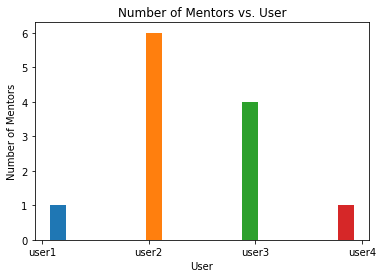

In [1099]:
plt.hist(users,bins=4)
plt.xlabel("User")
plt.ylabel("Number of Mentors")
plt.title("Number of Mentors vs. User")

In [1102]:
X=[]
for i in range(0, len(users)):
    for j in range(0,len(users[i])):
        X.append(users[i][j])
        
Y=[]
for i in range(0, len(m)):
    for j in range(0,len(m[i])):
        Y.append(m[i][j])
        
Y

['23.0',
 '21.0',
 '20.0',
 '22.0',
 '102.0',
 '26.0',
 '9.0',
 '7.0',
 '103.0',
 '102.0',
 '4.0',
 '37.0']

Text(0.5, 1.0, 'Mentor ID vs. User')

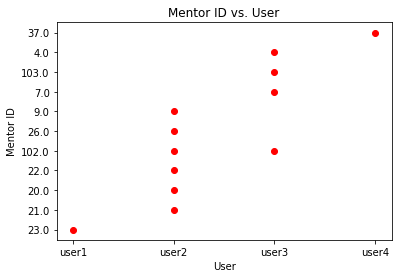

In [1111]:
plt.scatter(X,Y,color="RED")
plt.xlabel("User")
plt.ylabel("Mentor ID")
plt.title("Mentor ID vs. User")